<a href="https://colab.research.google.com/github/colt35/projekty/blob/main/ai_group_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
facebook_ads = pd.read_csv('/content/drive/My Drive/IT/SDA-AI/data/data.csv')

In [5]:
pd.DataFrame(facebook_ads)

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.000000,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.000000,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.000000,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.000000,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.000000,1,1.29,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,19/08/2017,19/08/2017,45-49,F,109,111,114,1129773,252,358.189997,13,2.00,NaN,NaN
1139,1314411,19/08/2017,19/08/2017,45-49,F,110,111,116,637549,120,173.880003,3,0.00,NaN,NaN
1140,1314412,19/08/2017,19/08/2017,45-49,F,111,113,117,151531,28,40.289999,2,0.00,NaN,NaN
1141,1314414,17/08/2017,17/08/2017,45-49,F,113,114,117,790253,135,198.710001,8,2.00,NaN,NaN


In [6]:
facebook_ads.shape

(1143, 15)

In [7]:
facebook_ads.columns

Index(['ad_id', 'reporting_start', 'reporting_end', 'campaign_id',
       'fb_campaign_id', 'age', 'gender', 'interest1', 'interest2',
       'interest3', 'impressions', 'clicks', 'spent', 'total_conversion',
       'approved_conversion'],
      dtype='object')

In [8]:
# wstępne zrozumienie zbioru danych poprzez :

facebook_ads.shape # dimensions of the dataset

facebook_ads.info() # information about columns, data types, missing values

facebook_ads.describe() # descriptive statistics for numerical columns

facebook_ads.isnull().sum() # number of missing values in each column

facebook_ads.duplicated().sum() # number of duplicate rows

facebook_ads.nunique() # number of unique values in each column

facebook_ads.head() # first few rows of the dataset

facebook_ads.columns # all column names



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

Index(['ad_id', 'reporting_start', 'reporting_end', 'campaign_id',
       'fb_campaign_id', 'age', 'gender', 'interest1', 'interest2',
       'interest3', 'impressions', 'clicks', 'spent', 'total_conversion',
       'approved_conversion'],
      dtype='object')

<ipython-input-9-e4910d2abbba>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  facebook_ads['reporting_start'] = pd.to_datetime(facebook_ads['reporting_start'])


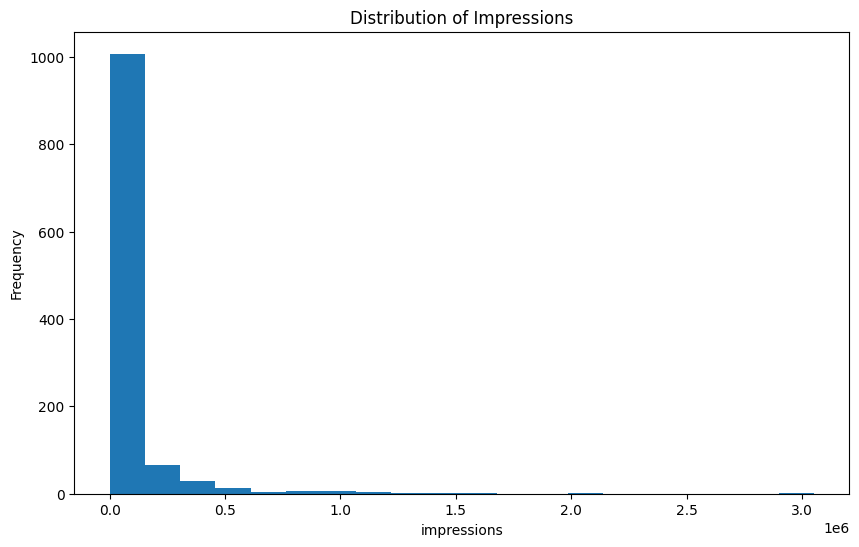

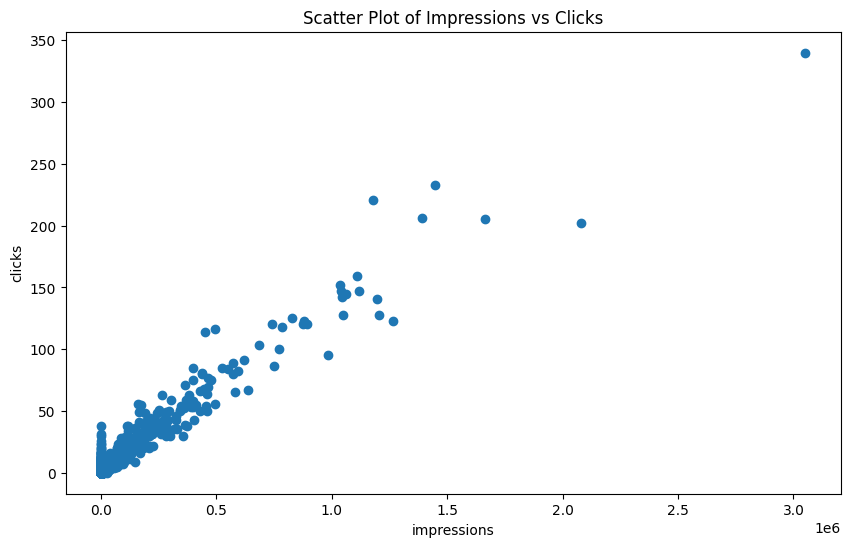

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


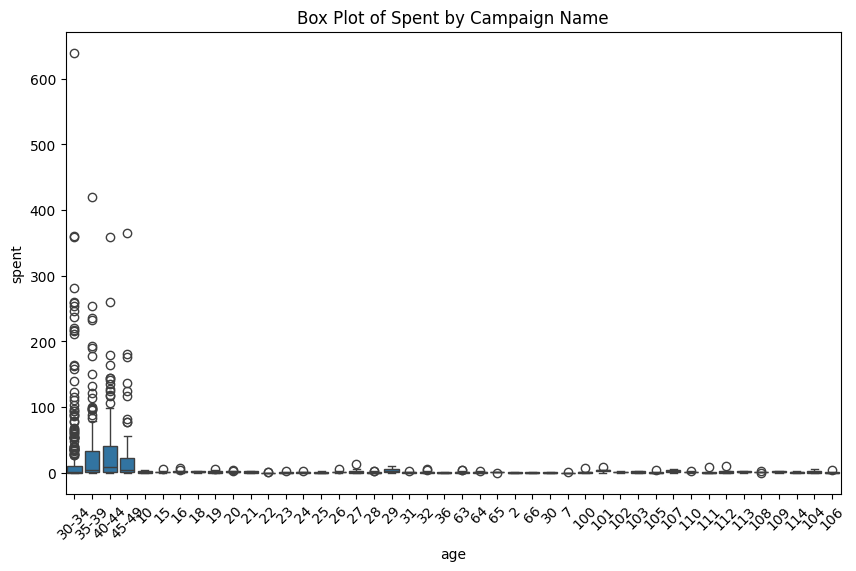

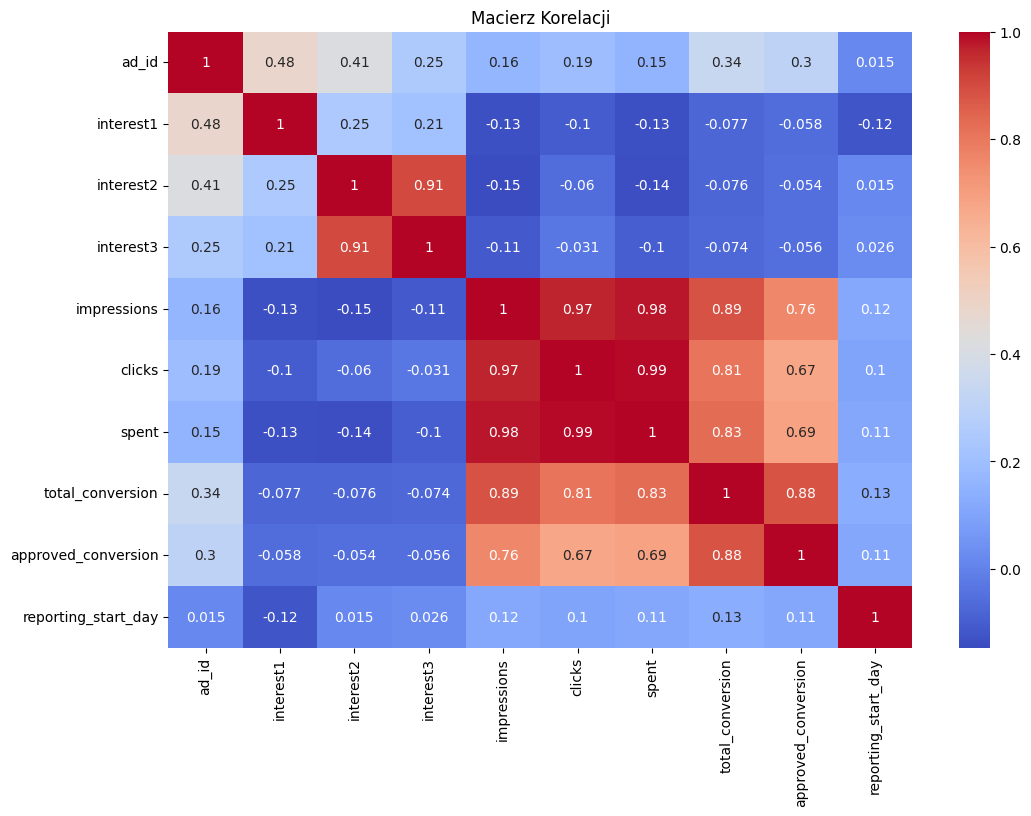

In [9]:
# Convert the 'reporting_start' column to datetime objects
if 'reporting_start' in facebook_ads.columns:
    facebook_ads['reporting_start'] = pd.to_datetime(facebook_ads['reporting_start'])

    # Extract the day of the month from the 'reporting_start' column
    facebook_ads['reporting_start_day'] = facebook_ads['reporting_start'].dt.day

    # Drop the original 'reporting_start' column
    facebook_ads = facebook_ads.drop('reporting_start', axis=1)

# Histogram of the 'Impressions' variable
plt.figure(figsize=(10, 6))
plt.hist(facebook_ads['impressions'], bins=20)
plt.title('Distribution of Impressions')
plt.xlabel('impressions')
plt.ylabel('Frequency')
plt.show()

# Scatter plot between 'Impressions' and 'Clicks'
plt.figure(figsize=(10, 6))
plt.scatter(facebook_ads['impressions'], facebook_ads['clicks'])
plt.title('Scatter Plot of Impressions vs Clicks')
plt.xlabel('impressions')
plt.ylabel('clicks')
plt.show()

# Box plot of 'Spent' grouped by 'Campaign Name'
plt.figure(figsize=(10, 6))
sb.boxplot(x='age', y='spent', data=facebook_ads)
plt.title('Box Plot of Spent by Campaign Name')
plt.xticks(rotation=45)
plt.show()

# Heatmap of the correlation matrix

numeric_columns = facebook_ads.select_dtypes(include=['number'])

# Heatmapa dla macierzy korelacji
plt.figure(figsize=(12, 8))
sb.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Macierz Korelacji')
plt.show()

    ad_id reporting_end campaign_id fb_campaign_id    age gender  interest1  \
0  708746    17/08/2017         916         103916  30-34      M         15   
1  708749    17/08/2017         916         103917  30-34      M         16   
2  708771    17/08/2017         916         103920  30-34      M         20   
3  708815    30/08/2017         916         103928  30-34      M         28   
4  708818    17/08/2017         916         103928  30-34      M         28   

   interest2  interest3  impressions  clicks  spent  total_conversion  \
0         17         17       7350.0       1   1.43               2.0   
1         19         21      17861.0       2   1.82               2.0   
2         25         22        693.0       0   0.00               1.0   
3         32         32       4259.0       1   1.25               1.0   
4         33         32       4133.0       1   1.29               1.0   

   approved_conversion  reporting_start_day  
0                  1.0                  

<ipython-input-14-fc9145fccfa0>:15: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  facebook_ads[col] = pd.to_datetime(facebook_ads[col])
<ipython-input-14-fc9145fccfa0>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  facebook_ads[col] = pd.to_datetime(facebook_ads[col])
<ipython-input-14-fc9145fccfa0>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  facebook_ads[col] = pd.to_datetime(facebook_ads[col])
<ipython-input-14-fc9145fccfa0>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, 

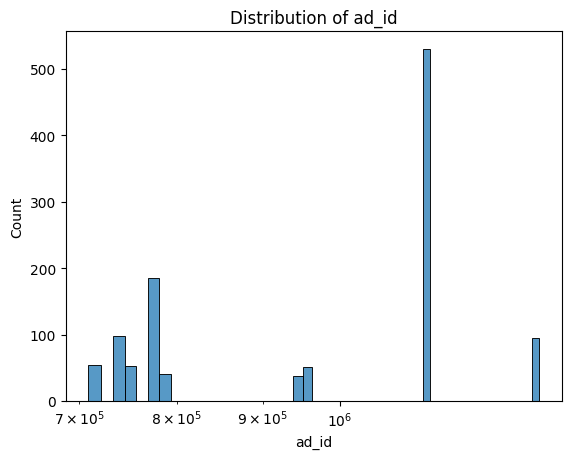

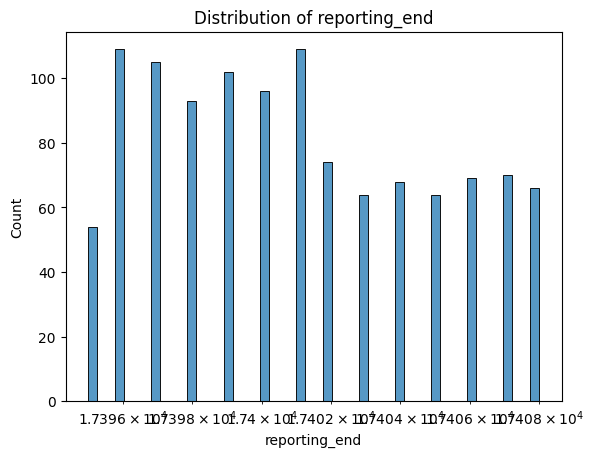

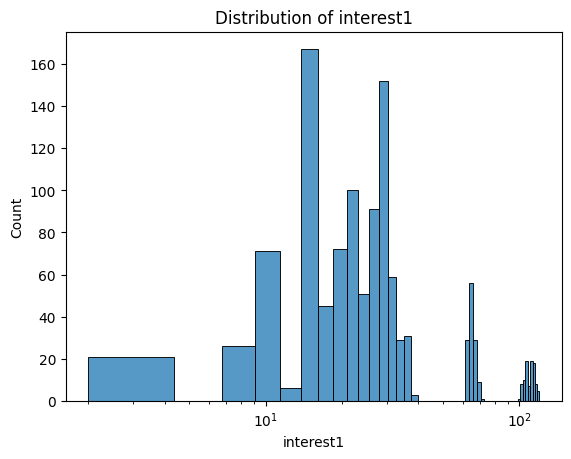

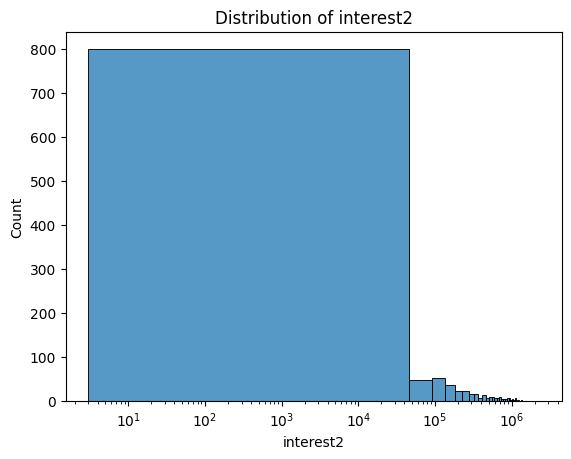

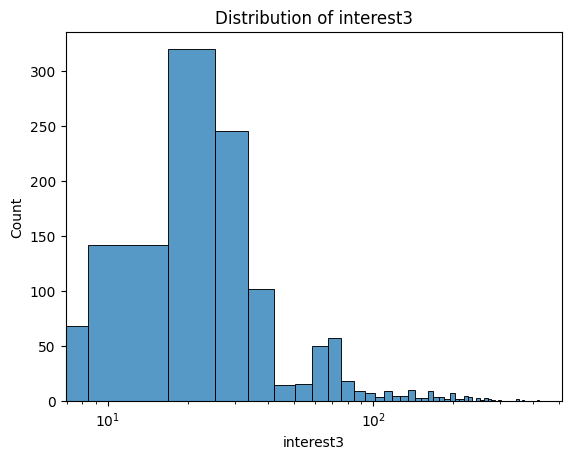

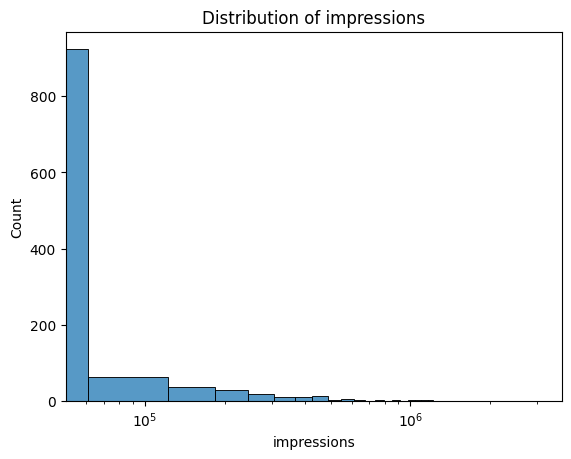

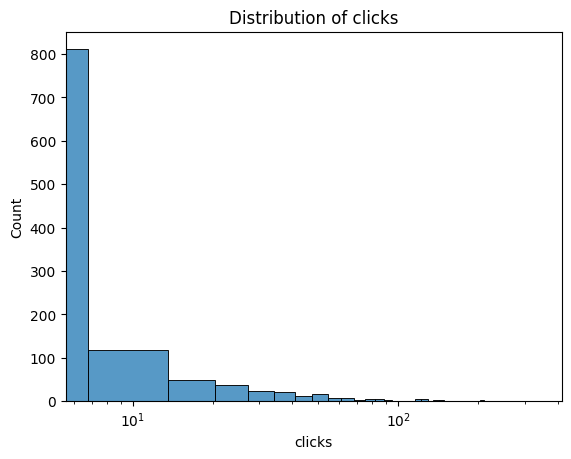

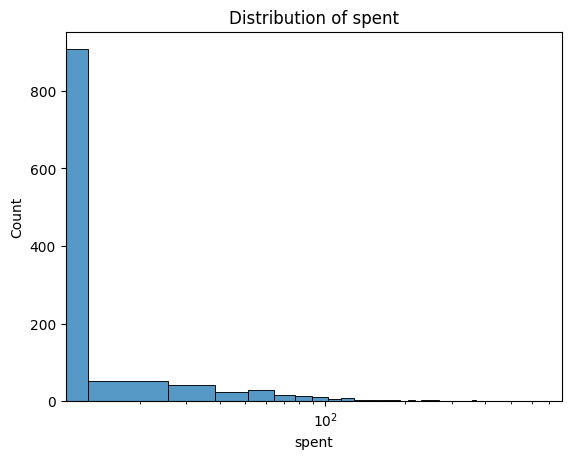

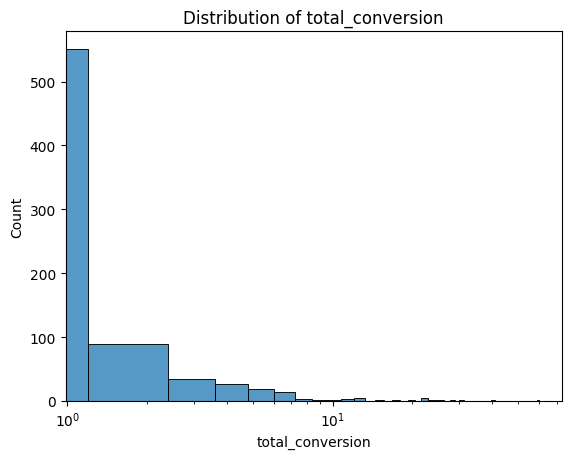

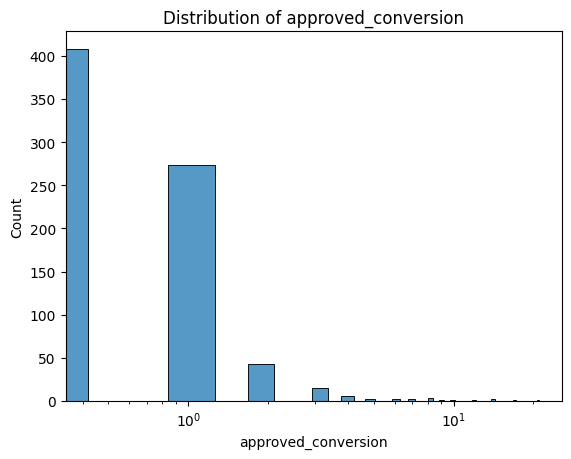

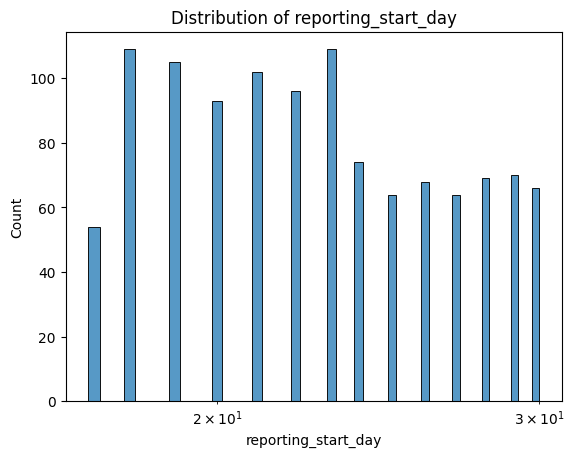

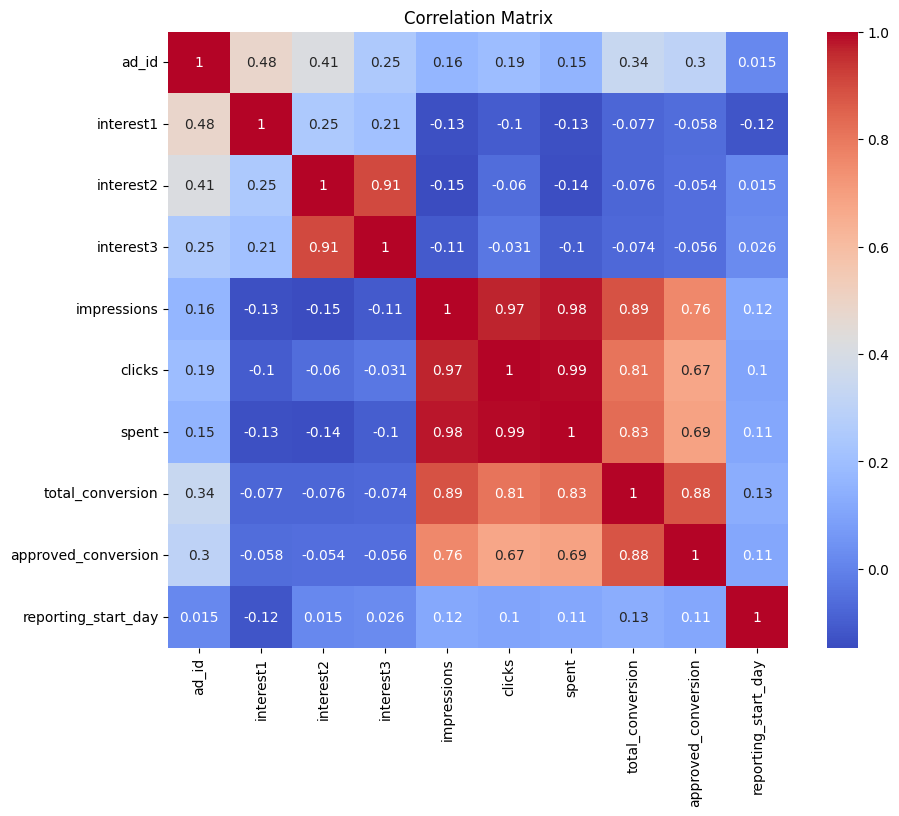

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


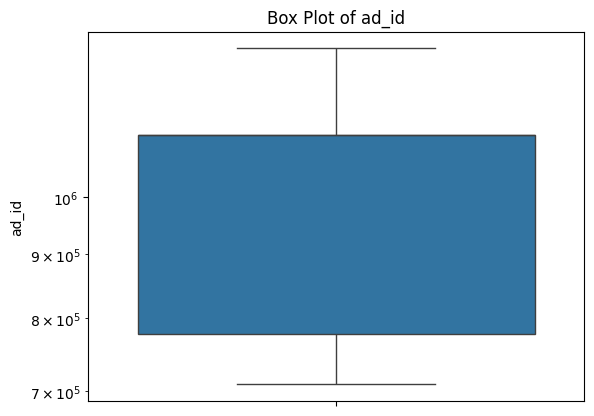

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


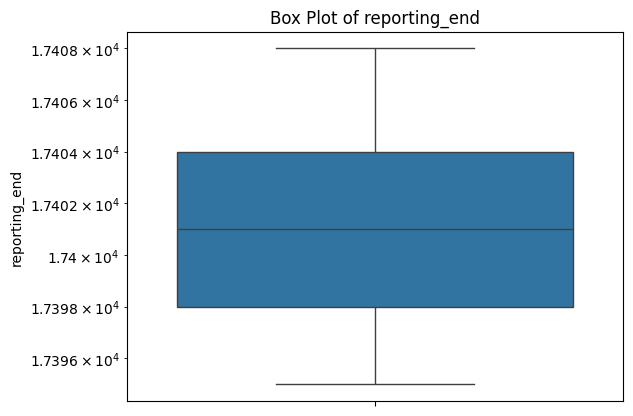

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


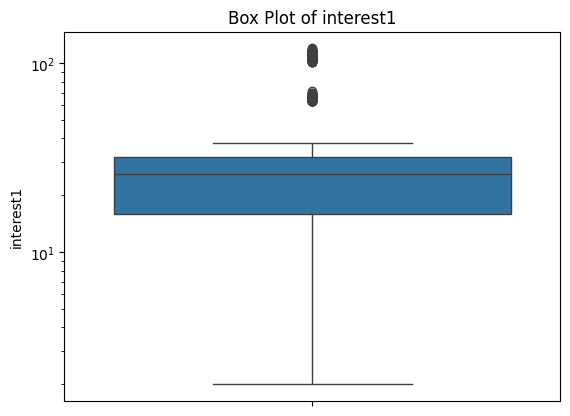

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


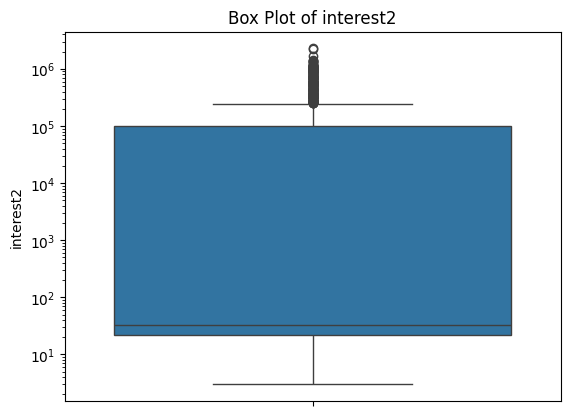

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


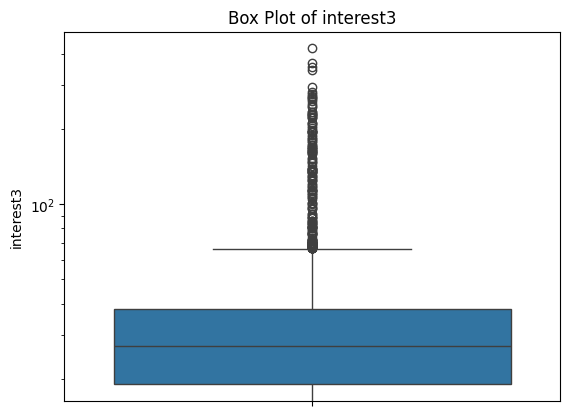

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


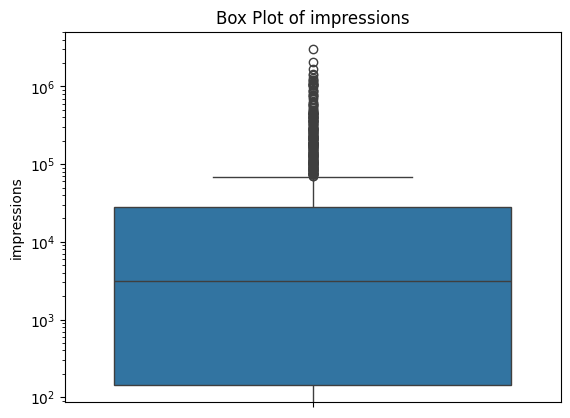

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


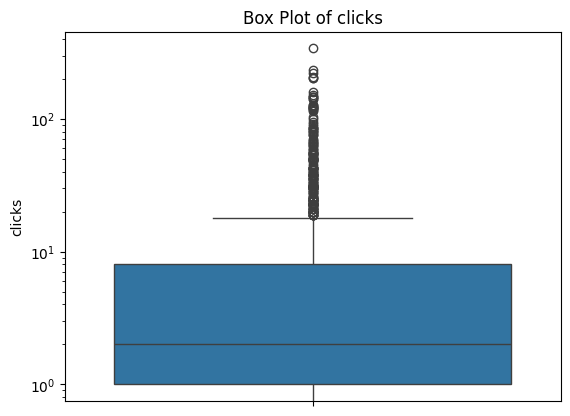

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


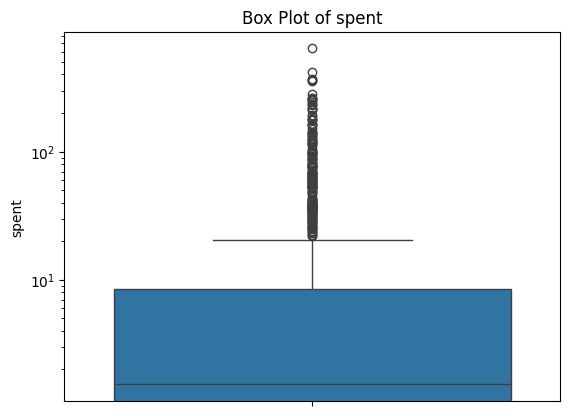

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


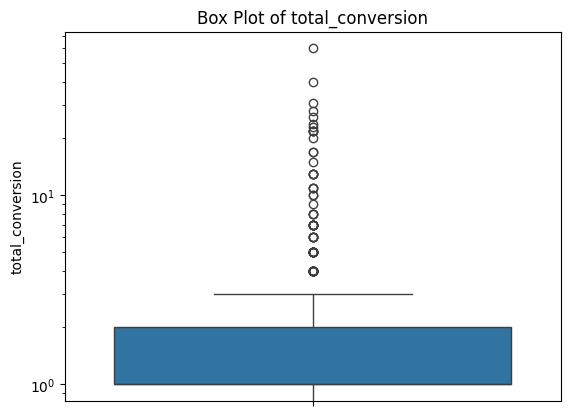

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


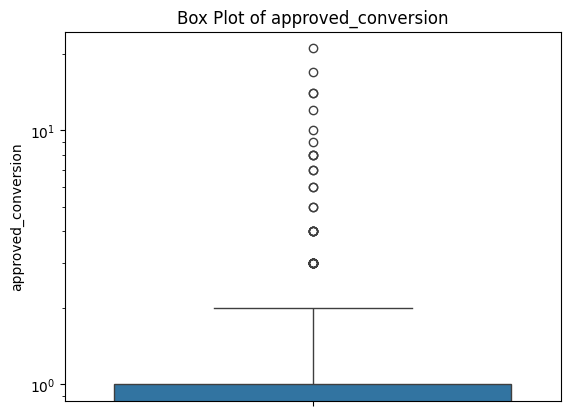

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


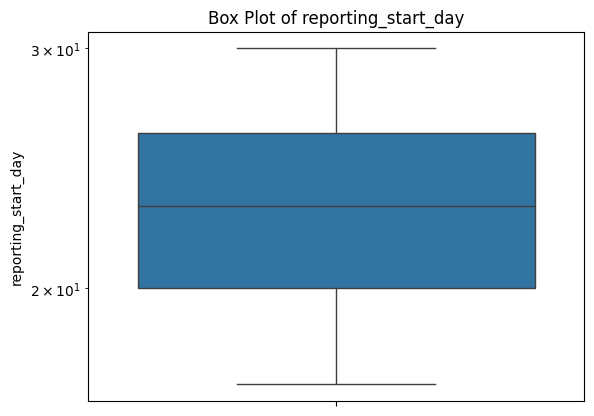

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # You need to import pandas


# Display basic information
print(facebook_ads.head())
print(facebook_ads.info())
print(facebook_ads.describe())

# Convert 'object' columns to datetime if they represent dates
for col in facebook_ads.columns:
    if facebook_ads[col].dtype == 'object':
        try:
            facebook_ads[col] = pd.to_datetime(facebook_ads[col])
        except:
            pass  # Skip if conversion fails

# Visualize data distributions with adjusted bins and scales
for col in facebook_ads.columns:
    if facebook_ads[col].dtype != 'object':
        plt.figure()
        sns.histplot(facebook_ads[col], bins=50)
        plt.title(f'Distribution of {col}')
        plt.xscale('log')
        plt.show()

# Calculate and visualize correlations for numeric columns
numeric_columns = facebook_ads.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify outliers using box plots with adjusted scales
for col in facebook_ads.columns:
    if facebook_ads[col].dtype != 'object':
        plt.figure()
        sns.boxplot(data=facebook_ads, y=col)
        plt.title(f'Box Plot of {col}')
        plt.yscale('log')
        plt.show()